In [30]:
pip install numpy pandas tensorflow scikit-learn matplotlib


Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [2]:
# Load IMDB dataset
from tensorflow.keras.datasets import imdb

# Set the number of top words to consider
top_words = 5000

# Load data and split into train and test sets
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

# Print shapes of data
print(f"Training data shape: {X_train.shape}, Testing data shape: {X_test.shape}")


Training data shape: (25000,), Testing data shape: (25000,)


In [5]:
# Set the maximum length for each review
max_review_length = 500

# Pad sequences to ensure uniform length
X_train = pad_sequences(X_train, maxlen=max_review_length)
X_test = pad_sequences(X_test, maxlen=max_review_length)

print(f"Padded Training data shape: {X_train.shape}, Padded Testing data shape: {X_test.shape}")


Padded Training data shape: (25000, 500), Padded Testing data shape: (25000, 500)


In [7]:
model = Sequential()

# Embedding layer to learn a word representation
model.add(Embedding(input_dim=top_words, output_dim=128, input_length=max_review_length))

# Dropout layer to prevent overfitting
model.add(SpatialDropout1D(0.2))

# LSTM layer for sequence learning
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))

# Dense layer with a sigmoid activation function for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model with binary cross-entropy loss and adam optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print model summary
model.summary()


D:\anaconda\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 300s 768ms/step - accuracy: 0.8368 - loss: 0.3845 - val_accuracy: 0.8300 - val_loss: 0.3912
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 282s 720ms/step - accuracy: 0.8506 - loss: 0.3471 - val_accuracy: 0.8325 - val_loss: 0.3846
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 276s 707ms/step - accuracy: 0.8779 - loss: 0.3068 - val_accuracy: 0.8474 - val_loss: 0.3690
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 277s 708ms/step - accuracy: 0.8076 - loss: 0.4077 - val_accuracy: 0.8393 - val_loss: 0.3782
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 283s 723ms/step - accuracy: 0.8728 - loss: 0.3040 - val_accuracy: 0.8503 - val_loss: 0.3577


In [18]:
# Evaluate the model performance on the test data
score, accuracy = model.evaluate(X_test, y_test, batch_size=64)
print(f"Test Accuracy: {accuracy*100:.2f}%")


391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 88ms/step - accuracy: 0.8490 - loss: 0.3631
Test Accuracy: 85.03%


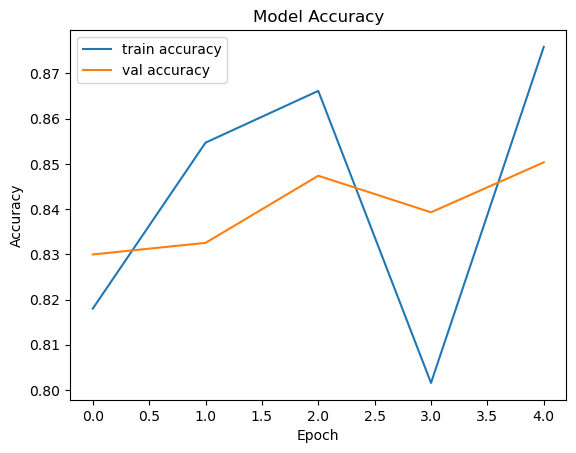

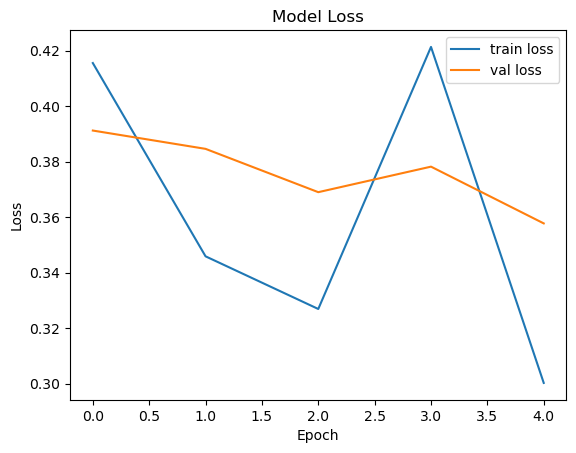

In [20]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [24]:
# Example of predicting the sentiment of a new review
sample_review = "This movie was amazing! I loved the characters and the plot."

# Load the word index from IMDB dataset (maps words to indices)
word_index = imdb.get_word_index()

# Tokenize the review: split it into words
tokens = sample_review.lower().split()

# Convert tokens into corresponding indices
indexed_tokens = [word_index.get(word, 0) for word in tokens]  # If word not found, assign 0

# Pad the sequence to the fixed input length
sample_review_padded = pad_sequences([indexed_tokens], maxlen=max_review_length)

# Make prediction
prediction = model.predict(sample_review_padded)
print(f"Predicted sentiment: {'Positive' if prediction > 0.5 else 'Negative'}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 659ms/step
Predicted sentiment: Positive


In [28]:
# Save model
model.save('sentiment_model.h5')

# Load model
new_model = tf.keras.models.load_model('sentiment_model.h5')
